# 多層ニューラルネットワークへの拡張

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(42)
tf.set_random_seed(42)

In [2]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7, 7], 18, 0)
df2 = generate_datablock(30, [7, -7], 18, 0)
df3 = generate_datablock(30, [7, 7], 18, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True) #縦に連結
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

### とりあえず可視化

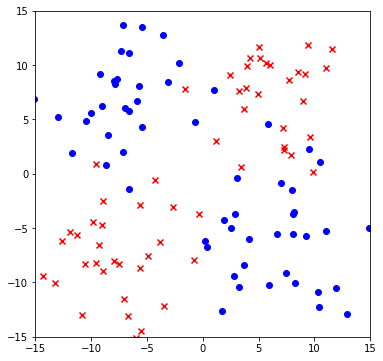

In [3]:
fig = plt.figure(figsize = (6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim([-15,15])
subplot.set_ylim([-15,15])
subplot.scatter(df0.x1, df0.x2, marker = 'x', color = 'r')
subplot.scatter(df1.x1, df1.x2, marker = 'o', color = 'b')
subplot.scatter(df2.x1, df2.x2, marker = 'o', color = 'b')
subplot.scatter(df3.x1, df3.x2, marker = 'x', color = 'r')
plt.show()

In [4]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set[['t']].values.reshape([len(train_set), 1])

In [5]:
num_units1 = 2
num_units2 = 2

x = tf.placeholder(tf.float32, [None, 2])

w1 = tf.Variable(tf.truncated_normal([2, num_units1]))
b1 = tf.Variable(tf.zeros([num_units1]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.truncated_normal([2, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(hidden1, w2) + b2)
                    
w0 = tf.Variable(tf.zeros([num_units2, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden2, w0) + b0)

In [6]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
i = 0
for _ in range(2000):
    i += 1
    sess.run(train_step, feed_dict = {x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 100, Loss: 83.136452, Accuracy: 0.491667
Step: 200, Loss: 83.075935, Accuracy: 0.508333
Step: 300, Loss: 82.911438, Accuracy: 0.500000
Step: 400, Loss: 82.462631, Accuracy: 0.583333
Step: 500, Loss: 81.122574, Accuracy: 0.633333
Step: 600, Loss: 78.203262, Accuracy: 0.641667
Step: 700, Loss: 72.049088, Accuracy: 0.683333
Step: 800, Loss: 59.766499, Accuracy: 0.716667
Step: 900, Loss: 41.854309, Accuracy: 0.916667
Step: 1000, Loss: 33.107021, Accuracy: 0.925000
Step: 1100, Loss: 29.435032, Accuracy: 0.925000
Step: 1200, Loss: 27.728115, Accuracy: 0.925000
Step: 1300, Loss: 26.801865, Accuracy: 0.933333
Step: 1400, Loss: 26.236000, Accuracy: 0.933333
Step: 1500, Loss: 25.848902, Accuracy: 0.941667
Step: 1600, Loss: 25.554361, Accuracy: 0.941667
Step: 1700, Loss: 25.308567, Accuracy: 0.941667
Step: 1800, Loss: 25.086823, Accuracy: 0.941667
Step: 1900, Loss: 24.873428, Accuracy: 0.941667
Step: 2000, Loss: 24.657854, Accuracy: 0.941667


### 領域の可視化

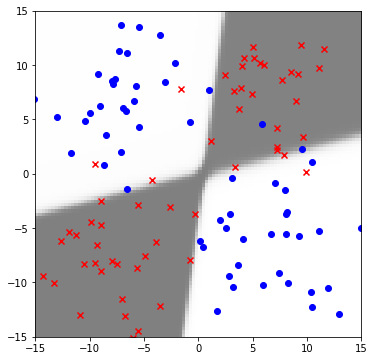

In [16]:
train_set1 = train_set[train_set['t'] == 1]
train_set2 = train_set[train_set['t'] == 0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim([-15,15])
subplot.set_ylim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker = 'x' , color = 'r')
subplot.scatter(train_set2.x1, train_set2.x2, marker = 'o', color = 'b')

locations = []
for x2 in np.linspace(-15, 15, 100):
    for x1 in np.linspace(-15, 15, 100):
        locations.append((x1, x2))
p_vals = sess.run(p, feed_dict={x:locations})
p_vals = p_vals.reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent = (-15, 15, -15, 15), cmap = plt.cm.gray_r, alpha=0.5)
plt.show()